## Experiment:

Draw $X_i$ from uniform distribution over $[0,1]$. $\tau$ is the smallest $n$ such that $X_1 + \cdots + X_n > 1$.

Supposedly, $\Bbb E[\tau] = e$

Average tau: 2.7013


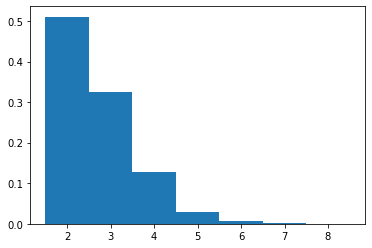

In [28]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

N = 10_000

results = []
for _ in range(N):
    x_sum = count = 0
    while x_sum <= 1 and count < 1_000:
        x_sum += rand()
        count += 1
    results.append(count)

print(f"Average tau: {np.mean(results)}")

plt.hist(results, bins = 0.5 + np.arange(1,max(results) + 1), density = True)
plt.show()

## Justification:


Let $\tau_m$ denote the smallest $n$ such that $X_1 + \cdots + X_n > m$. Let $f(m) = \Bbb E[\tau_m]$. 

We have:
$$
\Bbb E[\tau_m] = \int_0^m \Bbb E[\tau_m | X_1 = x] + \int_m^1 1\,dx\\
= \int_0^m (1 + \Bbb E[\tau_{m-x}])\,dx + (1-m)
$$
That is, 
$$
f(m) = \int_0^m (1 + f(x))\,dx + (1-m)
$$
Differentiating on both sides yields
$$
f'(m) = (1 + f(m)) - 1 \implies\\
f'(m) = f(m)
$$
Now that we have a differential equation, we need a reasonable value to assign $f(0)$. The trick is to select a value that will make $f(m)$ a continuous function (and in fact, we should expect $f$ to be differentiable).

I claim that the correct value here is $f(0) = 1$. Intuitively, we can justify this as follows: for small positive $m$, we should expect passing $m$ with $X_1$ alone to be practically a guarantee. So, the expected number of $X_i$ required should be slightly more than $1$ for small $m$, approaching $1$ as $m \to 0^+$. 

A more rigorous justification is presented further down.

With that, we now see that $f$ satisfies the initial value problem
$$
f'(m) = f(m); \quad f(0) = 1.
$$
With that, we conclude that $f(m) = e^m$, hence $f(1) = e^1 = e$, which was the expected result.


-----

Justification of $f(0) = 1$. 

As a more rigorous justification, we claim (without proof) that $f(m)$ is a positive, increasing function over $m$, and that $f(1)$ is finite. With that, we note that for $0 < m < 1$, we have
$$
\begin{align}
f(m) - 1 &= \left[\int_0^m (1 + f(x))\,dx + (1-m)\right] - 1
\\ & = m + \int_0^m (1 + f(x))\,dx
\end{align}
$$
We see at this point that $f(m) - 1$ is positive. We have
$$
\begin{align}
f(m) - 1 &= m + \int_0^m (1 + f(x))\,dx 
\\ & \leq m + \int_0^m (1 + f(1))\,dx
\\ & \leq m + m \cdot [1 + f(1)] = (2 + f(1)) m
\end{align}
$$
Thus, we have $0 \leq f(m) - 1 \leq (2 + f(1))m$. By the squeeze theorem, conclude that $\lim_{m \to 0^+}(f(m) - 1) = 0$, hence $\lim_{m \to 0^+}f(m) = 1$.